In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv('walmart.csv')

In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [12]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [14]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


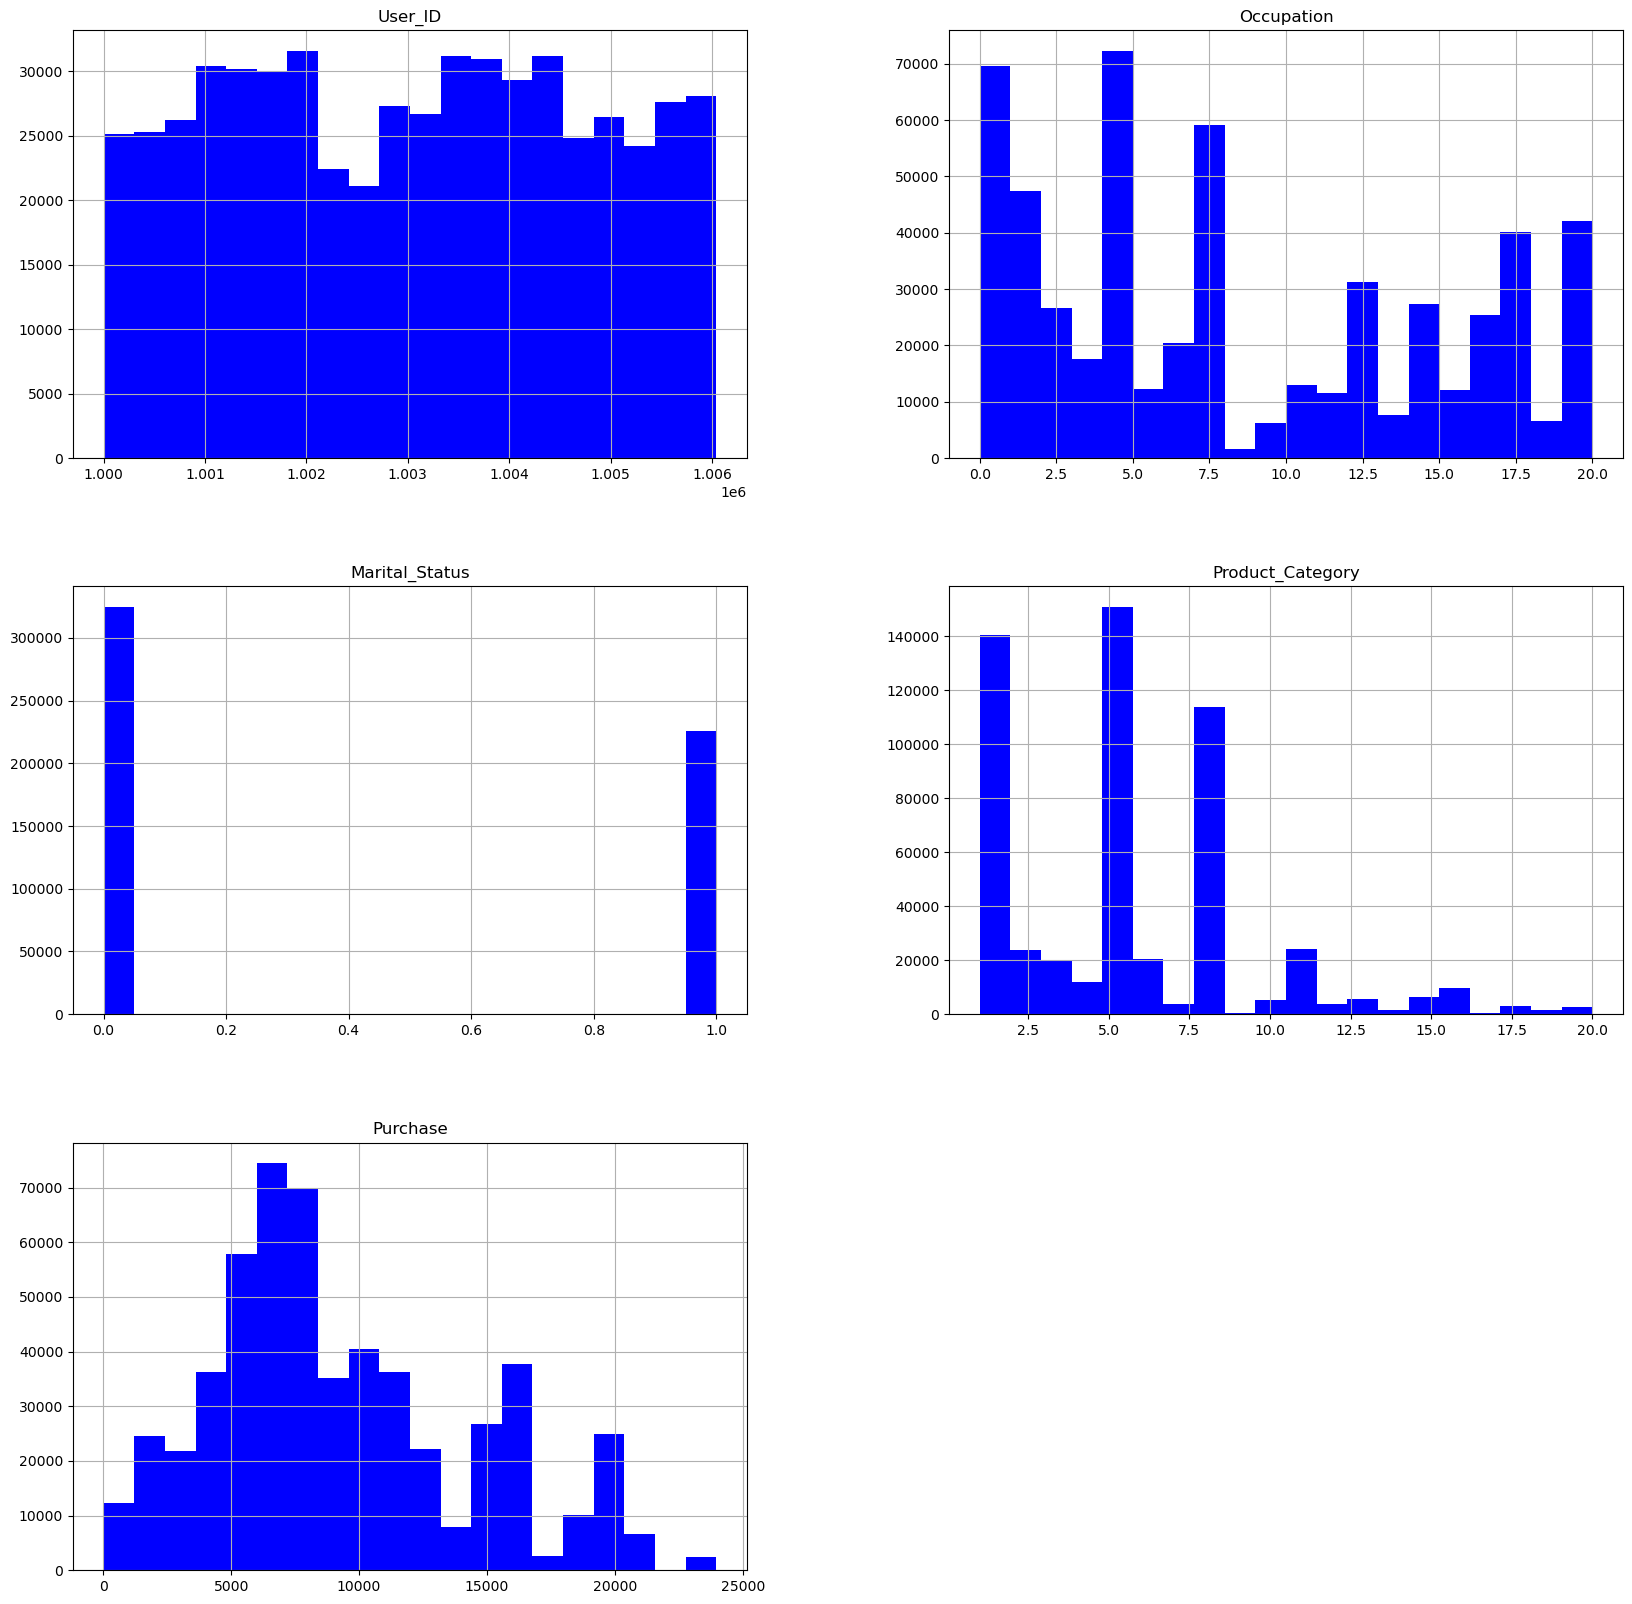

In [15]:
df.hist(bins = 20, figsize= (20,20), color = 'b')
plt.show()

In [16]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=np.number).columns

print(numeric_df)

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')


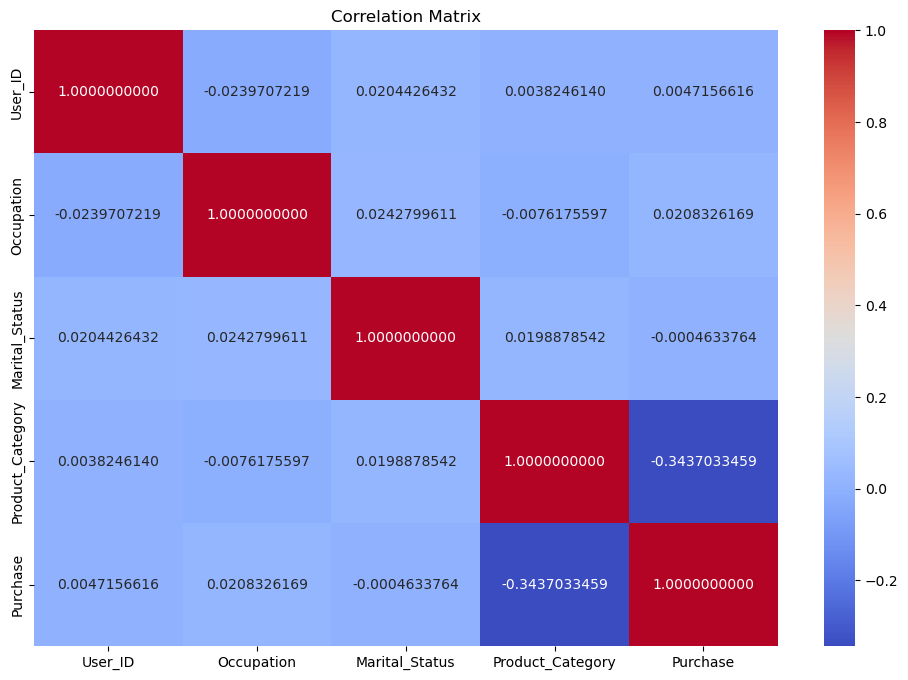

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_df].corr(), annot=True, fmt=".10f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Product category and marital status: .019887
purchase and occupation: .02083

In [ ]:
df['Product_Category'].nunique()

20

In [18]:
df_cat_purch = df.groupby('Product_Category')['Purchase'].sum()

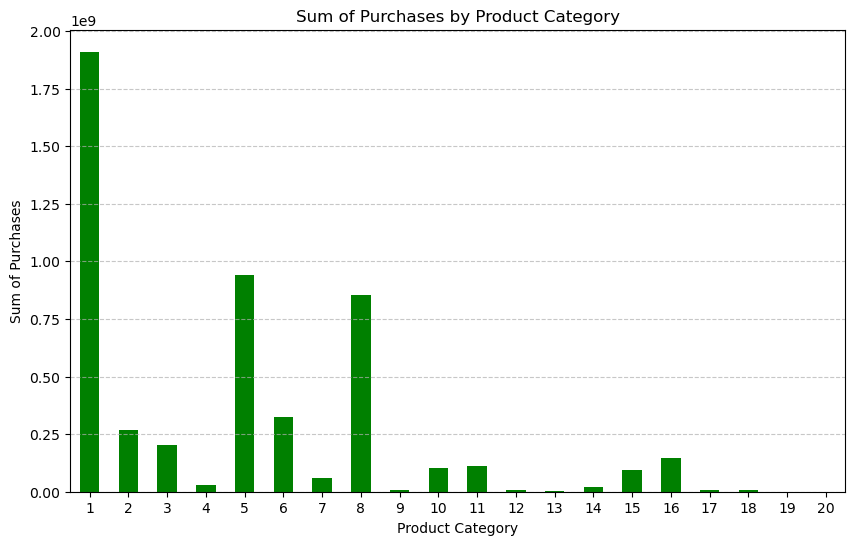

In [19]:
# Plotting
plt.figure(figsize=(10, 6))
df_cat_purch.plot(kind='bar', color='g')
plt.title('Sum of Purchases by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sum of Purchases')
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

In [20]:
df['Occupation'] = df['Occupation'].astype(str)
df['Marital_Status'] = df['Marital_Status'].astype(str)
df['Product_Category'] = df['Product_Category'].astype(str)
df['User_ID'] = df['User_ID'].astype(str)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [22]:
# Select categorical columns for encoding
categorical_cols = ['User_ID','Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']

# Use pandas get_dummies for one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Display the encoded DataFrame
print(df_encoded.head())


   Purchase  User_ID_1000001  User_ID_1000002  User_ID_1000003  \
0      8370             True            False            False   
1     15200             True            False            False   
2      1422             True            False            False   
3      1057             True            False            False   
4      7969            False             True            False   

   User_ID_1000004  User_ID_1000005  User_ID_1000006  User_ID_1000007  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   User_ID_1000008  User_ID_1000009  ...  Product_Category_19  \
0            False            False  ...                False   
1            False            Fals

In [23]:
from sklearn.preprocessing import StandardScaler

# Separate numerical columns for scaling
numerical_cols = ['Purchase']

# Scale numerical columns
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the scaled DataFrame
print(df_encoded.head())

   Purchase  User_ID_1000001  User_ID_1000002  User_ID_1000003  \
0 -0.177973             True            False            False   
1  1.181756             True            False            False   
2 -1.561193             True            False            False   
3 -1.633858             True            False            False   
4 -0.257805            False             True            False   

   User_ID_1000004  User_ID_1000005  User_ID_1000006  User_ID_1000007  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   User_ID_1000008  User_ID_1000009  ...  Product_Category_19  \
0            False            False  ...                False   
1            False            Fals

In [26]:
df_sampled = df_encoded.sample(n=20000, random_state=42)

In [27]:
from sklearn.cluster import KMeans

k = 6  # Example of choosing 6 clusters based on elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
df_sampled['Cluster'] = kmeans.fit_predict(df_sampled)

# Analyze the clusters
cluster_analysis = df_sampled.groupby('Cluster').mean()

# Display cluster analysis
print(cluster_analysis)

/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         Purchase  User_ID_1000001  User_ID_1000002  User_ID_1000003  \
Cluster                                                                
0       -0.572411         0.000000         0.000581         0.000000   
1        1.256875         0.000272         0.000545         0.000272   
2       -0.555690         0.000536         0.000000         0.000000   
3        1.256476         0.000000         0.000000         0.000000   
4       -0.572516         0.000000         0.000000         0.000000   
5       -0.584735         0.000000         0.000000         0.000000   

         User_ID_1000004  User_ID_1000005  User_ID_1000006  User_ID_1000007  \
Cluster                                                                       
0                0.00000         0.000000              0.0          0.00000   
1                0.00000         0.000000              0.0          0.00000   
2                0.00000         0.000000              0.0          0.00000   
3                0.00039    

/var/folders/3r/2mpjys7d7d79qqw79bbp8ry00000gn/T/ipykernel_37408/1471622803.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df_sampled, palette='viridis')


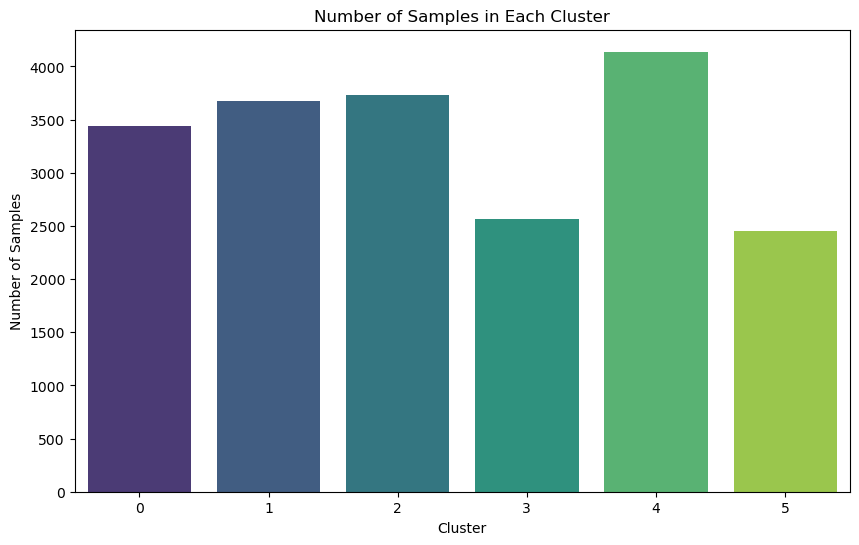

In [35]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df_sampled, palette='viridis')
plt.title('Number of Samples in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.show()


/var/folders/3r/2mpjys7d7d79qqw79bbp8ry00000gn/T/ipykernel_37408/1421422279.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feature_variances = df_sampled.groupby('Cluster').var().mean().sort_values(ascending=False)


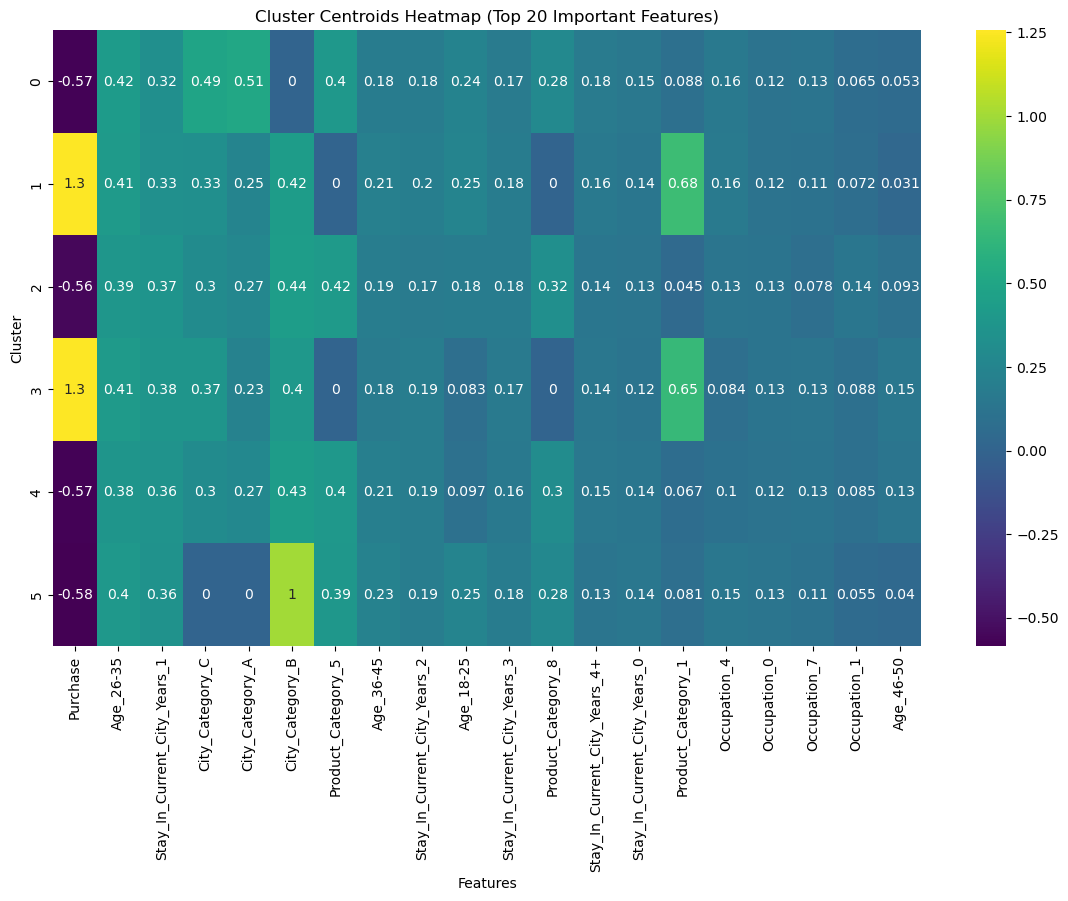

In [33]:
# Calculate variance of each feature for each cluster
feature_variances = df_sampled.groupby('Cluster').var().mean().sort_values(ascending=False)
top_20_features = feature_variances.index[:20]

cluster_centroids_top_features = cluster_analysis[top_20_features]

plt.figure(figsize=(14, 8))
sns.heatmap(cluster_centroids_top_features, cmap="viridis", annot=True)
plt.title('Cluster Centroids Heatmap (Top 20 Important Features)')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()


### Cluster Analysis

1. **Cluster 0**:
   - **High Purchase Value**: This cluster has a significantly lower average purchase value (-0.57).
   - **Age 26-35**: Shows higher values for this age group (0.42), indicating a significant proportion of customers in this age range.
   - **City Category B**: Also shows higher values for this feature (0.44), suggesting a strong presence in City Category B.

2. **Cluster 1**:
   - **Very High Purchase Value**: This cluster has the highest purchase value (1.3), indicating high spenders.
   - **Age Groups**: Shows balanced values across age groups, with a slight emphasis on 26-35 (0.41) and 36-45 (0.33).
   - **City Category A**: This feature has a high value (0.42), indicating a concentration in City Category A.

3. **Cluster 2**:
   - **Low Purchase Value**: This cluster has a significantly lower purchase value (-0.56).
   - **Age 26-35 and 36-45**: Higher values for these age groups (0.39 and 0.37, respectively).
   - **City Category C**: High value (0.37), indicating many customers in this category.
   - **Product Category 5**: Also has a higher value (0.42), showing preference for this product category.

4. **Cluster 3**:
   - **Very High Purchase Value**: This cluster has the highest purchase value (1.3).
   - **Age 26-35 and 36-45**: Higher values for these age groups (0.41 and 0.38, respectively).
   - **City Category C**: Moderate value (0.37), indicating some presence in this category.
   - **Product Category 1**: Very high value (0.65), indicating a strong preference for this product category.

5. **Cluster 4**:
   - **Low Purchase Value**: This cluster has a lower purchase value (-0.57).
   - **Age 26-35 and 36-45**: Shows moderate values for these age groups (0.38 and 0.36, respectively).
   - **City Category B**: High value (0.4), indicating a significant presence in this category.

6. **Cluster 5**:
   - **Low Purchase Value**: This cluster has a lower purchase value (-0.58).
   - **City Category A**: High value (1.0), indicating a very strong presence in this category.

### Key Takeaways

- **High Spend Clusters**: Clusters 1 and 3 have the highest purchase values. Cluster 1 is more diversified across age groups and city categories, whereas Cluster 3 has a strong preference for "Product Category 1" and a significant presence in "City Category C".
  
- **Low Spend Clusters**: Clusters 0, 2, 4, and 5 have lower purchase values. Cluster 2 is characterized by customers in "City Category C" and a preference for "Product Category 5". Cluster 4 has a notable presence in "City Category B", while Cluster 5 is dominated by "City Category A".

### Business Insights

- **Targeting High Spenders**: Focus marketing efforts on Clusters 1 and 3, emphasizing products and promotions related to their preferred categories and demographics.
- **Improving Engagement with Low Spenders**: Develop strategies to engage Clusters 0, 2, 4, and 5, potentially offering incentives or tailored promotions to increase their purchase value.
- **Geographic Strategies**: Tailor marketing and product availability based on the significant city categories for each cluster. For example, emphasize presence and availability in "City Category C" for Clusters 2 and 3.
- **Product Focus**: Highlight "Product Category 1" for Cluster 3 and "Product Category 5" for Cluster 2 to align with their preferences.
